In [ ]:
import os
from ultralytics import YOLO

def train(model_path="yolo11n.pt", dataset_dir="licence-plate-dataset", epochs=50, device="cuda"):
    """Train a YOLO model with the given dataset and parameters."""
    try:
        model = YOLO(model_path)
        data_path = os.path.join(os.getcwd(), dataset_dir, 'data.yaml')

        if not os.path.exists(data_path):
            raise FileNotFoundError(f"Dataset file not found: {data_path}")

        # Train the model
        train_results = model.train(
            data=data_path,
            epochs=epochs,
            device=device
        )

        print("Training complete. Best model saved in:", "runs/detect/train/weights/best.pt")
        return train_results

    except Exception as e:
        print(f"Error during training: {e}")
        return None

# Run training inside Jupyter
train()


In [ ]:
!dir

In [32]:
from ultralytics import YOLO
import torch

# Load the trained YOLO model
model = YOLO("best.pt")  # Ensure 'best.pt' is in the correct path

# Run inference on an image
# results = model("test_image.jpg")  # This returns a list of results (one per image)
results = model("test_3.jpeg", save=True)

# The annotated image will be saved in runs/detect/predict/.


# Extract bounding boxes (in xyxy format)
xyxy = results[0].boxes.xyxy.cpu().numpy()

# Print the bounding boxes
print("Bounding Boxes (xyxy):", xyxy)


image 1/1 /Users/tammarongpakittiwet/Desktop/ANPR/PythonYolo/ANPR/test_3.jpeg: 480x640 1 License_Plate, 82.1ms
Speed: 1.6ms preprocess, 82.1ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)
Results saved to /Users/tammarongpakittiwet/ultralytics/ultralytics/ultralytics/runs/detect/predict17
Bounding Boxes (xyxy): [[     125.78      254.71      894.26      561.52]]


In [28]:
!pip install paddlepaddle

In [33]:
from paddleocr import PaddleOCR
import cv2

# Initialize OCR
ocr = PaddleOCR(lang='en')

# Load image (ensure the path is correct!)
img_path = "test_3.jpeg"
img = cv2.imread(img_path)

# Verify image loading
if img is None:
    raise FileNotFoundError(f"Image not found at {img_path}")

# Run OCR
result = ocr.ocr(img, cls=True)

# Print results
for line in result:
    print(line)


[2025/04/17 15:23:06] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/Users/tammarongpakittiwet/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/Users/tammarongpakittiwet/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape

In [34]:
import cv2
import numpy as np
from ultralytics import YOLO
import os

# Load the trained YOLO model
model = YOLO("best.pt")  # Ensure 'best.pt' is in the correct path

# Run inference on an image
results = model("test_3.jpeg")  # Inference without saving annotated image

# Load the original image
image = cv2.imread("test_3.jpeg")

# Create output directory for cropped images
output_dir = "cropped_objects"
os.makedirs(output_dir, exist_ok=True)

# Loop through detected objects and crop them
for i, box in enumerate(results[0].boxes.xyxy.cpu().numpy()):
    x1, y1, x2, y2 = map(int, box)  # Convert to integers

    # Crop the detected object
    cropped_img = image[y1:y2, x1:x2]

    # Save the cropped image
    cropped_filename = f"{output_dir}/cropped_{i+1}.jpg"
    cv2.imwrite(cropped_filename, cropped_img)
    print(f"Cropped object {i+1} saved as {cropped_filename}")



image 1/1 /Users/tammarongpakittiwet/Desktop/ANPR/PythonYolo/ANPR/test_3.jpeg: 480x640 1 License_Plate, 79.2ms
Speed: 1.5ms preprocess, 79.2ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)
Cropped object 1 saved as cropped_objects/cropped_1.jpg


In [35]:
!dir

zsh:1: command not found: dir


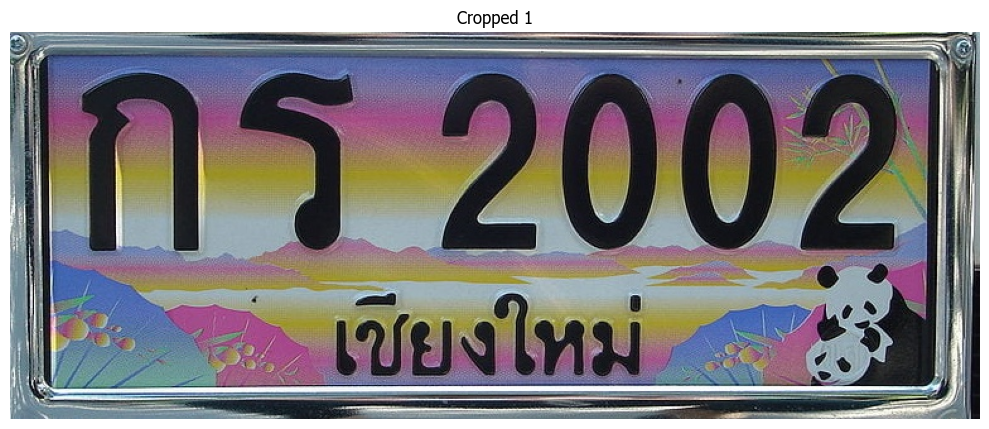

In [36]:
import cv2
import matplotlib.pyplot as plt
import os

# Directory where cropped images were saved
output_dir = "cropped_objects"

# List all cropped images
cropped_images = sorted([f for f in os.listdir(output_dir) if f.startswith("cropped_")])

# Plot all cropped images
plt.figure(figsize=(10, 5))

for i, img_name in enumerate(cropped_images):
    img_path = os.path.join(output_dir, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct color display
    
    plt.subplot(1, len(cropped_images), i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Cropped {i+1}")

plt.tight_layout()
plt.show(block=True)


In [37]:
from paddleocr import PaddleOCR
import cv2

# Load PaddleOCR with English language support
ocr = PaddleOCR(use_angle_cls=True, lang='en')

# Load the image
img = cv2.imread("./cropped_objects/cropped_1.jpg")

# Perform OCR
result = ocr.ocr(img, cls=True)

# Extract the detected text
if result and result[0]:  # Ensure there's a detection
    data = result[0][0][1][0]  # Extract the first detected text
    print("Detected Text:", data)
else:
    print("No text detected.")


[2025/04/17 15:23:09] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/Users/tammarongpakittiwet/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/Users/tammarongpakittiwet/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape

In [38]:
!pip install easyocr

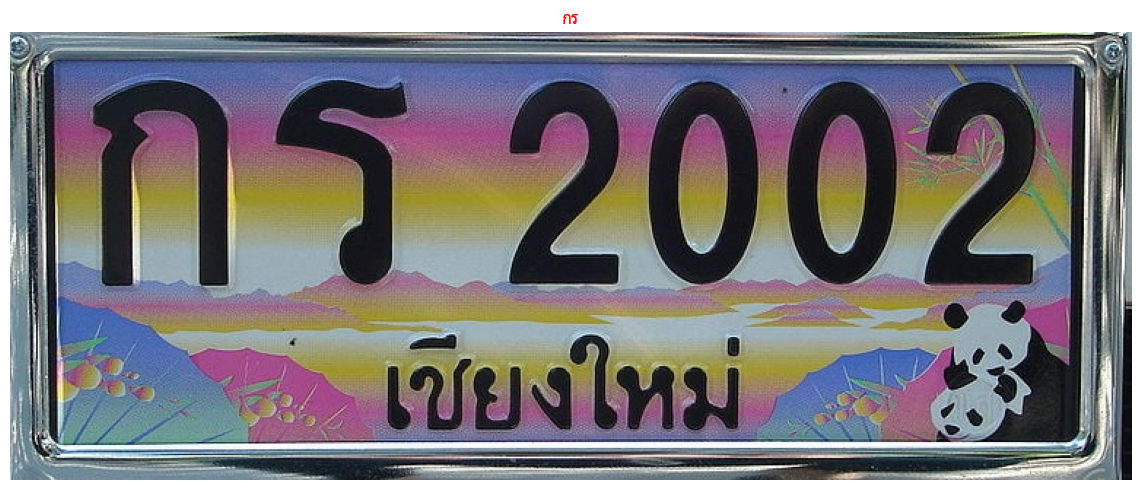

In [39]:
import os
import cv2
import matplotlib.pyplot as plt
import easyocr

# Load EasyOCR reader
reader = easyocr.Reader(['th', 'en'])

# Directory containing cropped images
output_dir = "cropped_objects"
cropped_images = sorted([f for f in os.listdir(output_dir) if f.startswith("cropped_")])

# Set up matplotlib figure
plt.figure(figsize=(15, 5))

# Loop through cropped images and perform OCR
for i, img_name in enumerate(cropped_images):
    img_path = os.path.join(output_dir, img_name)
    
    # Load the image
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Perform OCR using EasyOCR
    results = reader.readtext(img)

    # Extract detected text
    detected_text = results[0][1] if results else "No text detected"

    # Display image and text
    plt.subplot(1, len(cropped_images), i + 1)
    plt.imshow(img_rgb)
    plt.title(detected_text, fontsize=12, color='red')
    plt.axis("off")

# Adjust layout and show
plt.tight_layout()
plt.show()


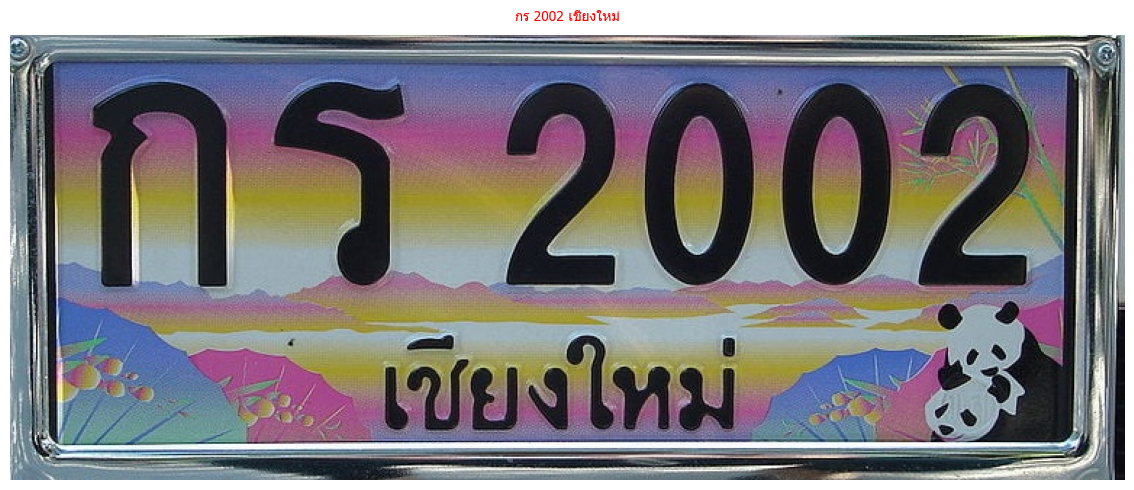

In [40]:
import os
import cv2
import matplotlib.pyplot as plt
import easyocr
from matplotlib import font_manager

# Load Thai-compatible font for matplotlib (if available)
try:
    # Try to use a Thai font like "Garuda" or "Tahoma"
    font_path = font_manager.findfont("Tahoma") 
    plt.rcParams['font.family'] = font_manager.FontProperties(fname=font_path).get_name()
except:
    print("Thai font not found. Default font may not display Thai correctly.")

# Initialize EasyOCR for Thai
reader = easyocr.Reader(['th'])

# Directory containing cropped images
output_dir = "cropped_objects"
cropped_images = sorted([f for f in os.listdir(output_dir) if f.startswith("cropped_")])

# Set up matplotlib figure
plt.figure(figsize=(15, 5))

# Loop through cropped images and perform OCR
for i, img_name in enumerate(cropped_images):
    img_path = os.path.join(output_dir, img_name)
    
    # Load the image
    img = cv2.imread(img_path)
    if img is None:
        print(f"Error loading {img_path}. Skipping...")
        continue
    
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Perform OCR (without min_confidence)
    results = reader.readtext(img)

    # Filter results by confidence (e.g., keep results with confidence >= 0.5)
    filtered_results = [res for res in results if res[2] >= 0.5]  # res[2] = confidence score

    # Extract detected text (join multiple lines if needed)
    detected_text = " ".join([res[1] for res in filtered_results]) if filtered_results else "ไม่พบข้อความ (No text detected)"

    # Display image and text
    plt.subplot(1, len(cropped_images), i + 1)
    plt.imshow(img_rgb)
    plt.title(detected_text, fontsize=10, color='red', pad=10)
    plt.axis("off")

# Adjust layout and show
plt.tight_layout()
plt.show()